# Imports

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Exploration

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# Data Preparation

In [8]:
from numpy import nan

In [9]:
data.loc[data.TotalCharges == " "][["customerID", "TotalCharges"]]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [10]:
data.TotalCharges = data.TotalCharges.mask(data.TotalCharges == ' ', nan)

In [11]:
data.dropna(inplace=True)

In [12]:
data.TotalCharges = data.TotalCharges.astype('float')

In [13]:
data.shape

(7032, 21)

In [14]:
for col in data.columns:
    print(col, ":", data[col].nunique())

customerID : 7032
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 72
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1584
TotalCharges : 6530
Churn : 2


In [15]:
prepared_data = pd.get_dummies(data.drop("customerID", axis=1), drop_first=True)

In [16]:
prepared_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


# Data Visualisation

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

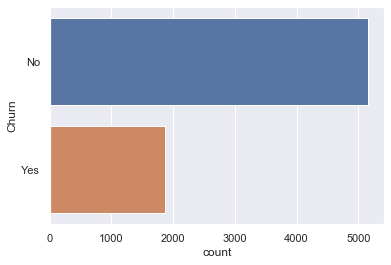

In [18]:
sns.countplot(y="Churn", data=data)

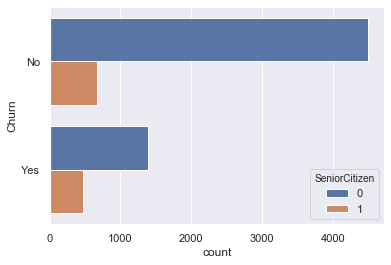

In [19]:
sns.countplot(hue="SeniorCitizen", y="Churn", data=data)

# Customer Segmentation

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Elbow Plot

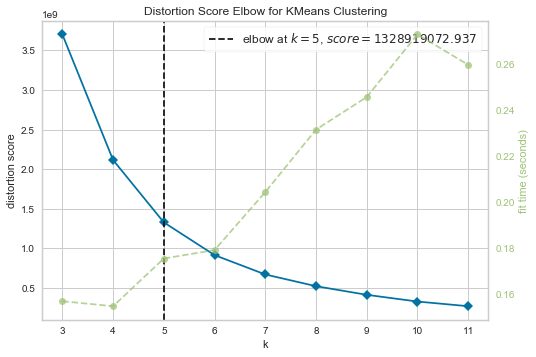

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,12)
)

visualizer.fit(prepared_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## KMeans Clustering

In [22]:
model = KMeans(n_clusters=5, n_init=25, random_state=3773)

In [23]:
model.fit(prepared_data)

KMeans(n_clusters=5, n_init=25, random_state=3773)

In [24]:
prepared_data["KMeansLabels"] = model.labels_

In [25]:
prepared_data.KMeansLabels.value_counts()

1    2849
3    1662
0    1018
4     887
2     616
Name: KMeansLabels, dtype: int64

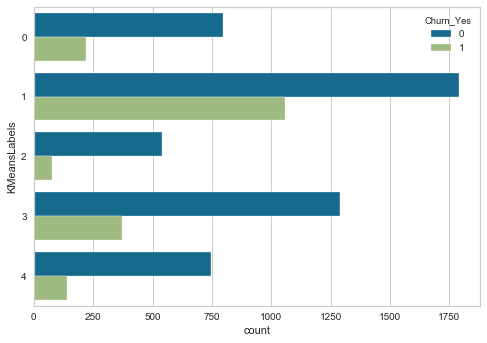

In [26]:
sns.countplot(y="KMeansLabels", hue="Churn_Yes", data=prepared_data)

In [76]:
cluster_1 = prepared_data[prepared_data.Churn_Yes == 1]

In [77]:
cluster_1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,KMeansLabels
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094,0.497592,0.357945,0.174425,0.909042,0.090958,0.454789,...,0.060460,0.437667,0.088818,0.025682,0.749064,0.124131,0.573034,0.164794,1.0,1.547887
std,0.435799,19.531123,24.666053,1890.822994,0.500128,0.479524,0.379576,0.287626,0.287626,0.498085,...,0.238401,0.496232,0.284556,0.158228,0.433668,0.329819,0.494770,0.371094,0.0,1.156159
min,0.000000,1.000000,18.850000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,2.000000,56.150000,134.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,0.000000,10.000000,79.650000,703.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,1.000000
75%,1.000000,29.000000,94.200000,2331.300000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,3.000000
max,1.000000,72.000000,118.350000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,4.000000


## Visualisation across Clusters

In [49]:
from utils import plot_facet

In [53]:
plot_facet(name="kmeans", X=prepared_data.drop(["Churn_Yes", "KMeansLabels"], axis=1), cluster_predictions=prepared_data.KMeansLabels)

<Figure size 720x864 with 0 Axes>

ß![FacetGrid](outputs/kmeans_facetgrid.png)